# Diverse Subgroup via W-2 Barycenter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from scipy.linalg import sqrtm


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Step 1: Generate random data points.

### One can also consider as first K-means performed on a single data set in the diverse subgroup case.

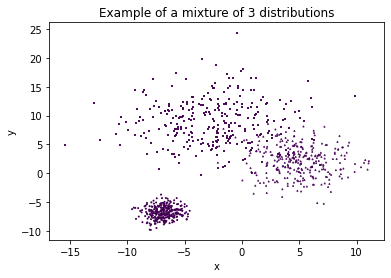

In [2]:
n_components = 3

n_components = 3
X, truth = make_blobs(n_samples=900, centers=n_components, 
                      cluster_std = [4, 2.5, 1], 
                      random_state=42)
plt.scatter(X[truth == 0, 0], X[truth == 0, 1], s=np.zeros(300) +1, marker="s", c = np.zeros(300))
plt.scatter(X[truth == 1, 0], X[truth == 1, 1], s=np.zeros(300) +1, marker="^", c = np.zeros(300))
plt.scatter(X[truth == 2, 0], X[truth == 2, 1], s=np.zeros(300) +1, marker="o", c = np.zeros(300))
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");


## Step 2: Find the pseudo-barycenter of the clusters and the optimal affine maps from the clusters to the pseudo-barycenter.

In [3]:
X_mean = []

for i in range(0,3):
  X_mean.append(sum(X[truth == i])/300)

X_ave = np.mean(X)

X_cov = []

for i in range(0,3):
  X_cov.append((X[truth == i] - X_mean[i]).T @ (X[truth == i] - X_mean[i])/ 300)

X_barcov = np.random.rand(2,2)

eps = 10

while eps > 0.00001:
  X_new = 0
  for i in range(0,3):
      X_new = X_new + (1/3) * sqrtm(sqrtm(X_barcov) @ X_cov[i] @ sqrtm(X_barcov))
  eps = np.linalg.norm(X_new - X_barcov)
  X_barcov = X_new


### Remark: the computation of pseudo-barycenter only uses sample means and covariance matrices. The iterative method converges within a second on my personal computer.

In [4]:
T = []

for i in range(0,3):
  T.append(np.linalg.inv(sqrtm(X_cov[i])) @ sqrtm( sqrtm(X_cov[i]) @ X_barcov @ sqrtm(X_cov[i]) ) @ np.linalg.inv(sqrtm(X_cov[i])))

X_bar = np.zeros(X.shape)

for i in range(0,3):
  X_bar[truth == i] = (X[truth == i] - X_mean[i]) @ T[i].T + X_ave


### Remark: the pseudo-barycenter merges the 3 marginals together as shown below.

In [5]:
n_components = 3

n_components = 3
X, truth = make_blobs(n_samples=900, centers=n_components, 
                      cluster_std = [4, 2.5, 1], 
                      random_state=42)



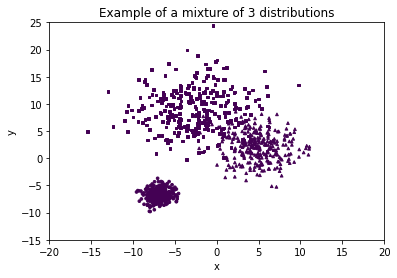

In [6]:
plt.scatter(X[truth == 0, 0], X[truth == 0, 1], s=np.zeros(300) +7, marker="s", c = np.zeros(300))
plt.scatter(X[truth == 1, 0], X[truth == 1, 1], s=np.zeros(300) +7, marker="^", c = np.zeros(300))
plt.scatter(X[truth == 2, 0], X[truth == 2, 1], s=np.zeros(300) +7, marker="o", c = np.zeros(300))
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");
plt.xlim(-20, 20)
plt.ylim(-15, 25)
plt.savefig('distributions.png')

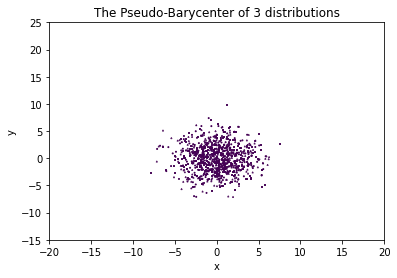

In [7]:
plt.scatter(X_bar[truth == 0, 0], X_bar[truth == 0, 1], s=np.zeros(300) +1, marker="s", c = np.zeros(300))
plt.scatter(X_bar[truth == 1, 0], X_bar[truth == 1, 1], s=np.zeros(300) +1, marker="^", c = np.zeros(300))
plt.scatter(X_bar[truth == 2, 0], X_bar[truth == 2, 1], s=np.zeros(300) +1, marker="o", c = np.zeros(300))
plt.title(f"The Pseudo-Barycenter of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-20, 20)
plt.ylim(-15, 25)
plt.savefig('pseudo_barycenter.png')

## Step 3: Perform K-means on the pseudo-barycenter, then keep the K-means labeling on the original data set.

### One can see from the plot below that data points share the same color (in the same barycenter cluster) have similar relative position within their original distributions.

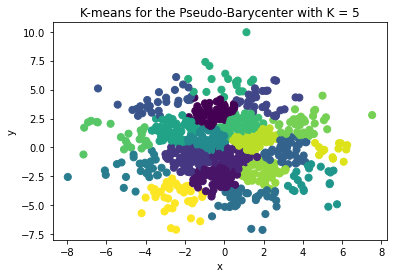

In [8]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(X_bar)

label = kmeans.labels_
mean = kmeans.cluster_centers_

plt.scatter(X_bar[:, 0], X_bar[:, 1], s=50, c = label)
plt.title(f"K-means for the Pseudo-Barycenter with K = 5")
plt.xlabel("x")
plt.ylabel("y");

NameError: name 'cons' is not defined

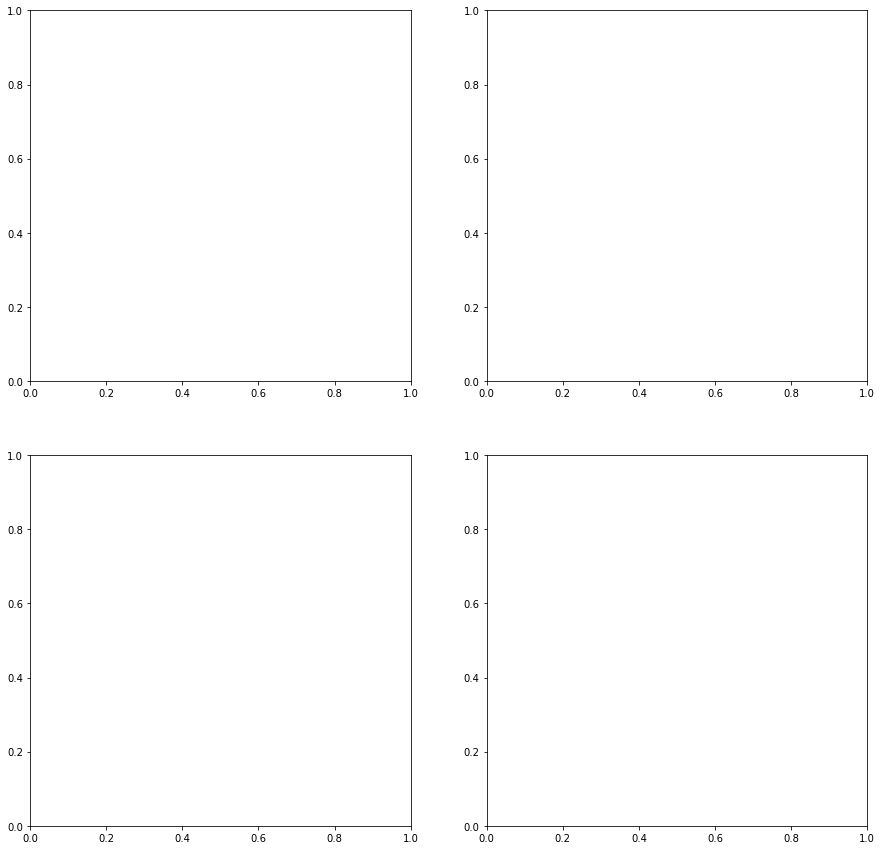

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))

for i in range(0,2):
  k = cons[i]

  kmeans = KMeans(n_clusters=k, random_state=0).fit(X_bar)
  label = kmeans.labels_
  mean = kmeans.cluster_centers_

  axs[i, 0].scatter(X_bar[truth == 0, 0], X_bar[truth == 0, 1], s=np.zeros(300) +20, marker="s", c = label[truth == 0])
  axs[i, 0].scatter(X_bar[truth == 1, 0], X_bar[truth == 1, 1], s=np.zeros(300) +20, marker="o", c = label[truth == 1])
  axs[i, 0].scatter(X_bar[truth == 2, 0], X_bar[truth == 2, 1], s=np.zeros(300) +20, marker="^", c = label[truth == 2])
  axs[i, 0].set_title(f"{k}-means on Pseudo-Barycenter", fontsize=15)
  axs[i, 0].set_xlabel('X', fontsize=14)
  axs[i, 0].set_ylabel('Y', fontsize=14)

  axs[i, 1].scatter(X[truth == 0, 0], X[truth == 0, 1], s=np.zeros(300) +20, marker="s", c = label[truth == 0])
  axs[i, 1].scatter(X[truth == 1, 0], X[truth == 1, 1], s=np.zeros(300) +20, marker="o", c = label[truth == 1])
  axs[i, 1].scatter(X[truth == 2, 0], X[truth == 2, 1], s=np.zeros(300) +20, marker="^", c = label[truth == 2])
  axs[i, 1].set_title(f"Original data with barycenter {k}-means label", fontsize=15)
  axs[i, 1].set_xlabel('X', fontsize=14)
  axs[i, 1].set_ylabel('Y', fontsize=14)

fig.subplots_adjust(wspace=0.4,hspace=0.4)
plt.savefig('diverse K-means.png', dpi=400,bbox_inches='tight')


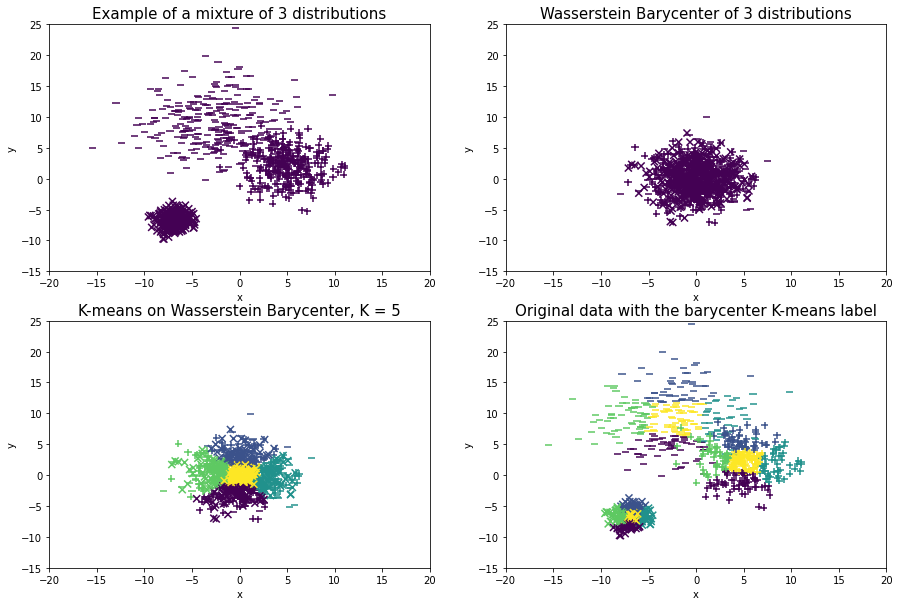

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

axs[0, 0].scatter(X[truth == 0, 0], X[truth == 0, 1], s=np.zeros(300) +50, marker="_", c = np.zeros(300))
axs[0, 0].scatter(X[truth == 1, 0], X[truth == 1, 1], s=np.zeros(300) +50, marker="+", c = np.zeros(300))
axs[0, 0].scatter(X[truth == 2, 0], X[truth == 2, 1], s=np.zeros(300) +50, marker="x", c = np.zeros(300))
axs[0, 0].set_title(f"Example of a mixture of {n_components} distributions", fontsize=15)
axs[0, 0].set_xlabel("x", fontsize=10)
axs[0, 0].set_ylabel("y", fontsize=10)
axs[0, 0].set_xlim(-20, 20)
axs[0, 0].set_ylim(-15, 25)

axs[0, 1].scatter(X_bar[truth == 0, 0], X_bar[truth == 0, 1], s=np.zeros(300) +50, marker="_", c = np.zeros(300))
axs[0, 1].scatter(X_bar[truth == 1, 0], X_bar[truth == 1, 1], s=np.zeros(300) +50, marker="+", c = np.zeros(300))
axs[0, 1].scatter(X_bar[truth == 2, 0], X_bar[truth == 2, 1], s=np.zeros(300) +50, marker="x", c = np.zeros(300))
axs[0, 1].set_title(f"Wasserstein Barycenter of {n_components} distributions", fontsize=15)
axs[0, 1].set_xlabel("x", fontsize=10)
axs[0, 1].set_ylabel("y", fontsize=10)
axs[0, 1].set_xlim(-20, 20)
axs[0, 1].set_ylim(-15, 25)

kmeans = KMeans(n_clusters=5, random_state=0).fit(X_bar)
label = kmeans.labels_
mean = kmeans.cluster_centers_


axs[1, 0].scatter(X_bar[truth == 0, 0], X_bar[truth == 0, 1], s=np.zeros(300) +50, marker="_", c = label[truth == 0])
axs[1, 0].scatter(X_bar[truth == 1, 0], X_bar[truth == 1, 1], s=np.zeros(300) +50, marker="+", c = label[truth == 1])
axs[1, 0].scatter(X_bar[truth == 2, 0], X_bar[truth == 2, 1], s=np.zeros(300) +50, marker="x", c = label[truth == 2])
axs[1, 0].set_title(f"K-means on Wasserstein Barycenter, K = 5", fontsize=15)
axs[1, 0].set_xlabel("x", fontsize=10)
axs[1, 0].set_ylabel("y", fontsize=10)
axs[1, 0].set_xlim(-20, 20)
axs[1, 0].set_ylim(-15, 25)

axs[1, 1].scatter(X[truth == 0, 0], X[truth == 0, 1], s=np.zeros(300) +50, marker="_", c = label[truth == 0])
axs[1, 1].scatter(X[truth == 1, 0], X[truth == 1, 1], s=np.zeros(300) +50, marker="+", c = label[truth == 1])
axs[1, 1].scatter(X[truth == 2, 0], X[truth == 2, 1], s=np.zeros(300) +50, marker="x", c = label[truth == 2])
axs[1, 1].set_title(f"Original data with the barycenter K-means label", fontsize=15)
axs[1, 1].set_xlabel("x", fontsize=10)
axs[1, 1].set_ylabel("y", fontsize=10)
axs[1, 1].set_xlim(-20, 20)
axs[1, 1].set_ylim(-15, 25)

fig.subplots_adjust(wspace=0.2,hspace=0.2)
plt.savefig('K-means on Pseudo-barycenter', dpi = 400, bbox_inches = 'tight')

## Step 6: Compare different sample methods with increasing sample size


#### Here, "random sample n" means uniform sampling with size = n on the original data set.
#### "cluster sample n" means unform sampling with size = n/3 on each of the 3 distributions of the original data set.
#### "barycenter sample n" means uniform sampling with size = n/(3*k) on each of the 3*k clusters.
#### "barycenter inverse n" means first do uniform sampling with size = n on the pseudo-barycenter, then apply the inverse of optimal affine to map the sample back to each of the 3 distributions. This is an estimation of the marginal distributions.

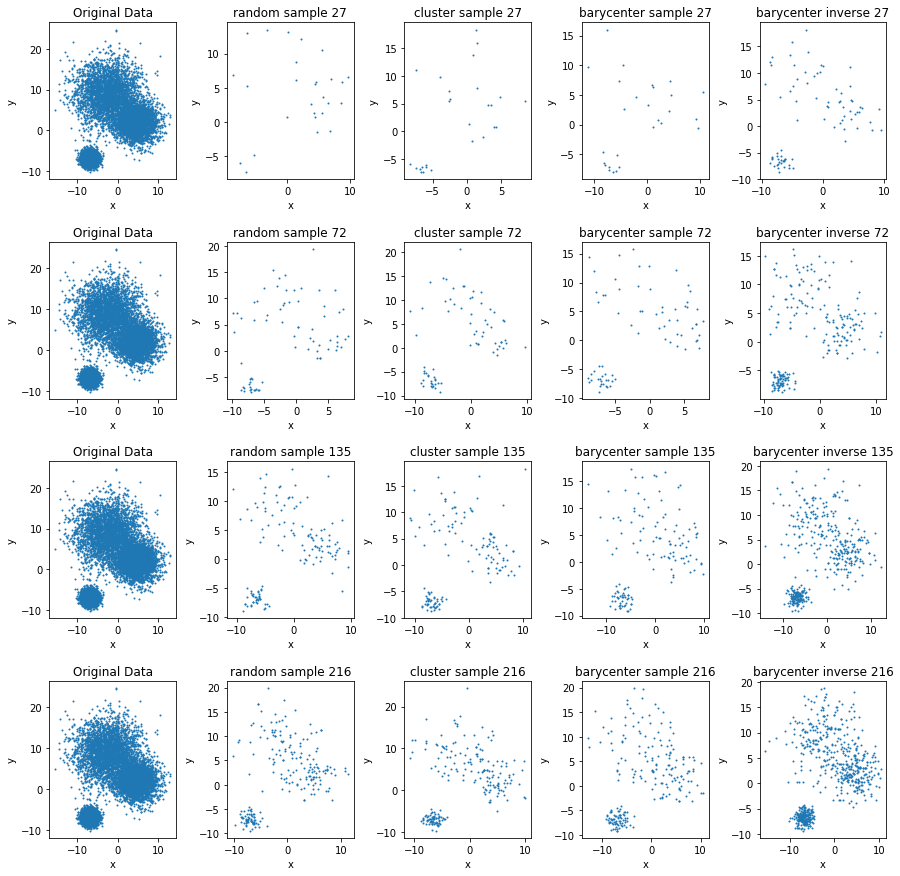

In [13]:
fig, axs = plt.subplots(4, 5, figsize=(15,15))

for i in range(0,4):
  k = (i+3)*(i+1)

  kmeans = KMeans(n_clusters=k, random_state=0).fit(X_bar)
  label = kmeans.labels_
  mean = kmeans.cluster_centers_

  sample_size = 9*k

  X_sgroup = np.zeros((sample_size,2))

  for j in range(0,k):
    for q in range(0,3):
      X_sgroup[range(9*j + 3*q ,9*j + 3*(q+1)),:] = X[np.logical_and(label == j , truth == q)][np.random.uniform(0,len(X[np.logical_and(label == j , truth == q)]),3).astype(int)]

  s = int(sample_size/3)
  X_clustersample = np.zeros((sample_size,2))

  for j in range(0,3):
    X_clustersample[range(s*j,s*(j+1)),:] = X[truth == j][np.random.uniform(0,len(X[truth == j]),s).astype(int)]

  X_sample = X[np.random.uniform(0,len(X),sample_size).astype(int)]

  X_barsample = X_bar[np.random.uniform(0,len(X),sample_size).astype(int)]

  X_invsample = np.zeros((sample_size*3,2))

  for j in range(0,3):
    X_invsample[range(sample_size*j,sample_size*(j+1)),:] = (X_barsample @ np.linalg.inv(T[j]).T) - (X_ave - X_mean[j])

  axs[i, 0].scatter(X[:, 0], X[:, 1], s=1)
  axs[i, 0].set_title(f"Original Data")
  axs[i, 0].set(xlabel = "x")
  axs[i, 0].set(ylabel = "y")

  axs[i, 1].scatter(X_sample[:, 0], X_sample[:, 1], s=1)
  axs[i, 1].set_title(f"random sample {sample_size}")
  axs[i, 1].set(xlabel = "x")
  axs[i, 1].set(ylabel = "y")

  axs[i, 2].scatter(X_clustersample[:, 0], X_clustersample[:, 1], s=1)
  axs[i, 2].set_title(f"cluster sample {sample_size}")
  axs[i, 2].set(xlabel = "x")
  axs[i, 2].set(ylabel = "y")

  axs[i, 3].scatter(X_sgroup[:, 0], X_sgroup[:, 1], s=1)
  axs[i, 3].set_title(f"barycenter sample {sample_size}")
  axs[i, 3].set(xlabel = "x")
  axs[i, 3].set(ylabel = "y")

  axs[i, 4].scatter(X_invsample[:, 0], X_invsample[:, 1], s=1)
  axs[i, 4].set_title(f"barycenter inverse {sample_size}")
  axs[i, 4].set(xlabel = "x")
  axs[i, 4].set(ylabel = "y")
  

fig.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

### It is clear from the plot above that for small sample size, "barycenter sample n" capture more diversed sample data points.

## Step 7: Compare different different sample methods with fixed sample size = 36 but increase the number of K-means clusters

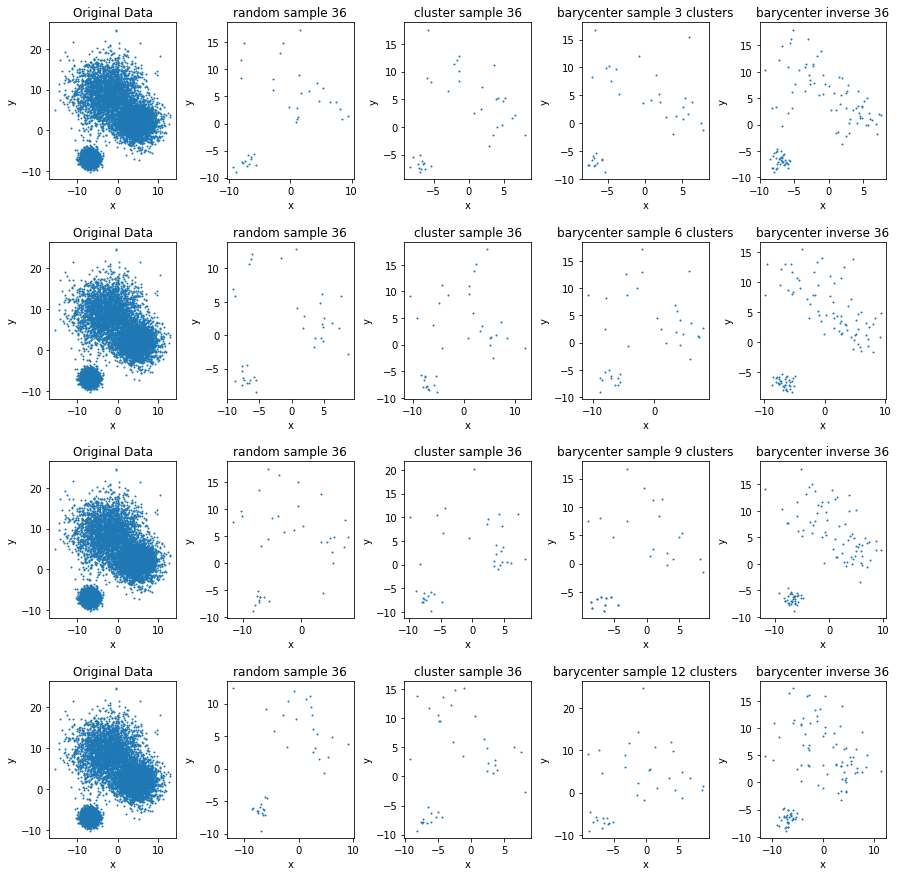

In [14]:
fig, axs = plt.subplots(4, 5, figsize=(15,15))

for i in range(0,4):
  k = (i+1)*3

  kmeans = KMeans(n_clusters=k, random_state=0).fit(X_bar)
  label = kmeans.labels_
  mean = kmeans.cluster_centers_

  X_sgroup = np.zeros((36,2))

  

  for j in range(0,k):
    for q in range(0,3):
      X_sgroup[range(int(36*j/k + 12*q/k),int(36*j/k + 12*(q+1)/k)),:] = X[np.logical_and(label == j , truth == q)][np.random.uniform(0,len(X[np.logical_and(label == j , truth == q)]),int(12/k)).astype(int)]

  X_clustersample = np.zeros((36,2))

  for j in range(0,3):
    X_clustersample[range(12*j,12*(j+1)),:] = X[truth == j][np.random.uniform(0,len(X[truth == j]),12).astype(int)]

  X_sample = X[np.random.uniform(0,len(X),36).astype(int)]

  X_barsample = X_bar[np.random.uniform(0,len(X),36).astype(int)]

  X_invsample = np.zeros((36*3,2))

  for j in range(0,3):
    X_invsample[range(36*j,36*(j+1)),:] = (X_barsample @ np.linalg.inv(T[j]).T) - (X_ave - X_mean[j])

  axs[i, 0].scatter(X[:, 0], X[:, 1], s=1)
  axs[i, 0].set_title(f"Original Data")
  axs[i, 0].set(xlabel = "x")
  axs[i, 0].set(ylabel = "y")

  axs[i, 1].scatter(X_sample[:, 0], X_sample[:, 1], s=1)
  axs[i, 1].set_title(f"random sample 36")
  axs[i, 1].set(xlabel = "x")
  axs[i, 1].set(ylabel = "y")

  axs[i, 2].scatter(X_clustersample[:, 0], X_clustersample[:, 1], s=1)
  axs[i, 2].set_title(f"cluster sample 36")
  axs[i, 2].set(xlabel = "x")
  axs[i, 2].set(ylabel = "y")

  axs[i, 3].scatter(X_sgroup[:, 0], X_sgroup[:, 1], s=1)
  axs[i, 3].set_title(f"barycenter sample {k} clusters")
  axs[i, 3].set(xlabel = "x")
  axs[i, 3].set(ylabel = "y")

  axs[i, 4].scatter(X_invsample[:, 0], X_invsample[:, 1], s=1)
  axs[i, 4].set_title(f"barycenter inverse 36")
  axs[i, 4].set(xlabel = "x")
  axs[i, 4].set(ylabel = "y")
  

fig.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

### By picking a small sample size = 36, we see that increasing the number of K-mean clusters results in increase in data diversity. Also, it is clear that the method is more stable in capture diverse data pionts than other methods.